In [6]:
import pandas as pd 
import numpy as np 
import math 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error

In [7]:
data = pd.read_csv('Hitters.csv')

In [8]:
df_hitters = data.copy()
df_hitters 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [9]:
# categorical variables 
print('The league types are : ' , df_hitters['League'].unique())
print('The division types are : ' , df_hitters['Division'].unique())
print('The new league types are : ' , df_hitters['NewLeague'].unique())

The league types are :  ['A' 'N']
The division types are :  ['E' 'W']
The new league types are :  ['A' 'N']


In [10]:
df_hitters_num = pd.get_dummies(df_hitters, columns=['League','Division','NewLeague'], drop_first=True)
df_hitters_num 

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0,True,False,True
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0,False,False,False
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0,False,True,False
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0,False,False,False


In [11]:
# Convert True/False to 1/0 for specific columns
df_hitters_num['League_N'] = df_hitters_num['League_N'].astype(int)
df_hitters_num['Division_W'] = df_hitters_num['Division_W'].astype(int)
df_hitters_num['NewLeague_N'] = df_hitters_num['NewLeague_N'].astype(int)

# Verify changes
print(df_hitters_num.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  Division_W  \
0    29      14      446       33      20     NaN         0           0   
1   414     375      632       43      10   475.0         1           1   
2   266     263      880       82      14   480.0         0           1   
3   838     354      200       11       3   500.0         1           0   
4    46      33      805       40       4    91.5         1           0   

   NewLeague_N  
0            0  
1            1  
2            0  


In [12]:
df_hitters.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [13]:
#fill nans with predicted values later 
df_hitters_num_nonull = df_hitters_num.dropna()
df_hitters_num_nonull.isnull().sum() 

AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
PutOuts        0
Assists        0
Errors         0
Salary         0
League_N       0
Division_W     0
NewLeague_N    0
dtype: int64

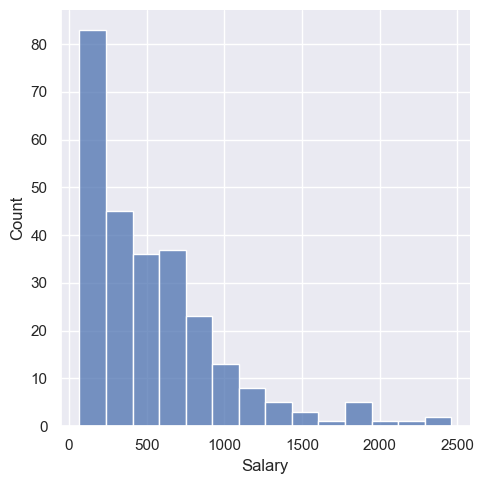

In [16]:
sns.displot(df_hitters_num_nonull['Salary']);

In [17]:
correlation =df_hitters_num_nonull.corr()
correlation['Salary'].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

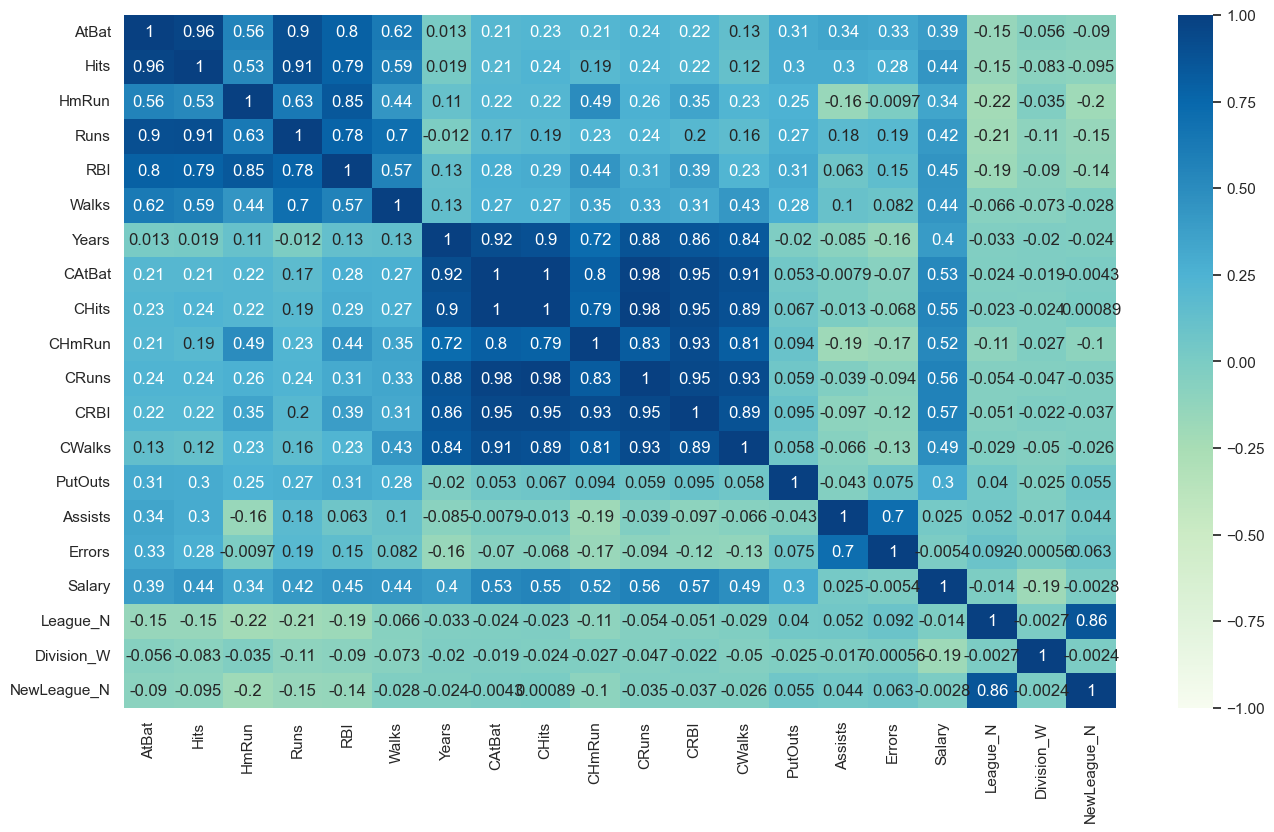

In [22]:
#check for potential multicollinearity with a heatmap 
plt.figure(figsize=(16,9))
sns.heatmap(df_hitters_num_nonull.corr(),
            vmin = -1, 
            vmax = 1, 
            cmap="GnBu", annot=True)
plt.show()

In [23]:
#declaring dependant and independant variables 
x = df_hitters_num_nonull.drop('Salary', axis=1)
y = df_hitters_num_nonull['Salary']

In [24]:
#splitting data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=365)

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [27]:
print('The linear regression coefficients are : ' , lin_reg.coef_ )
print('The linear regression y-intercept is : ' , lin_reg.intercept_)

The linear regression coefficients are :  [-216.58725574  176.6665394    26.42174341  -32.30723397    3.50396442
  114.47871878  -38.27993316 -900.68020534  836.55817419   28.55520441
  405.6848943    64.99526588 -187.22476547  115.53995185   68.62131273
  -13.90111177   58.90973857  -81.77905186  -35.02755069]
The linear regression y-intercept is :  532.2961176470588


In [28]:
lin_reg_y_pred = lin_reg.predict(x_test)
lin_reg_y_pred 

array([ 415.45782829,  432.20780272,  758.78349674,  799.00336712,
        350.20586478,  294.0659682 ,  184.24872446,  464.67402835,
       1108.05429466,  556.19984654,  488.06923001,  473.30471499,
        839.99519038,  751.59519044,  220.43742205,  320.16591592,
        340.14473675,  710.61012663,  170.8874789 ,  651.78620649,
        827.41281464,  196.71008612,  573.1185691 , 1172.76382687,
       1282.0883485 , 1594.28681356,  777.07655701, 1094.24965368,
        556.76207246, 1107.0708847 ,  477.61394579,  297.87571483,
        361.26177051,  503.18848321,  189.99424369,  241.50466799,
        248.98173212,  942.76631923,  617.30294655,  225.25956752,
        323.42092736,  455.93050456,  871.9585369 ,  379.23514877,
        620.49084963,  281.78622042,  566.78476943,  589.94187243,
        662.63913511,  545.01484672, 2012.42953081,  737.55139652,
        380.02427287,  443.3775693 , 1076.912394  ,  710.95238727,
        556.2946056 ,   68.23384264,  209.15575371,  195.57359

In [32]:
# Compare the predicted values with the actual ones
lin_comp = pd.DataFrame({
    'Predicted': lin_reg_y_pred, 
    'Actual': y_test
})
lin_comp

,Predicted,Actual
14,415.457828,240.0
181,432.207803,737.5
177,758.783497,1300.0
124,799.003367,737.5
277,350.205865,475.0
...,...,...
303,422.501932,425.0
264,383.905451,250.0
31,115.778511,110.0
204,315.352309,780.0


In [34]:
print('Linear Regression model RMSE', math.sqrt(mean_squared_error(y_test, lin_reg_y_pred))) #Measured in the same unit as the target variable
print('Linear Regression model Training score', lin_reg.score(x_train, y_train) )
print('Linear Regression model Testing score', lin_reg.score(x_test, y_test))

Linear Regression model RMSE 313.23956789940615
Linear Regression model Training score 0.5680589160518967
Linear Regression model Testing score 0.34559948297363363


In [35]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

In [36]:
# Initializing the ridge regressor
ridge = RidgeCV(alphas=np.arange(0.1, 10, 0.1), cv=cv, scoring='neg_mean_absolute_error')

In [38]:
# Fitting the ridge regressor
ridge.fit(x_train,y_train)
ridge_reg_y_pred = ridge.predict(x_test)

print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 9.9
Ridge model coefficients: [ -99.64056512   87.85475144   -3.70978058   22.50316688   18.34973213
   68.1928924   -55.21554926   -5.93096462  127.21511684   21.56457876
  129.7438877    93.22509485 -102.97057988  116.56925232   31.19052366
  -10.05599857   39.05110375  -80.7269112   -22.53792401]
Ridge model intercept: 532.2961176470588


In [40]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(x_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(x_test, y_test))

Ridge Regression Model RMSE is:  288.62308325272807
Ridge Regression Model Training Score:  0.5278667721769685
Ridge Regression Model Testing Score:  0.4444124247349731


In [41]:
# Initializing the lasso regressor
lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)

In [42]:
# Fitting the lasso regressor
lasso.fit(x_train,y_train)
lasso_reg_y_pred = lasso.predict(x_test)

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 8.2
Lasso model coefficients: [ 55.51095192  45.97703489  27.53137446   3.3631333    9.03843356
  49.43671419 126.70293106  45.10058938  23.05442632   9.85632406
   0.           3.15689767  -8.11886084 102.94992196   0.
  -0.          17.76359236 -85.73614642  -0.        ]
Lassso model intercept: 532.2961176470588


In [43]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(x_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(x_test, y_test))

Lasso Regression Model RMSE is:  304.2072505265753
Lasso Regression Model Training Score:  0.4482426197173428
Lasso Regression Model Testing Score:  0.3827948756282943


In [44]:
print("Linear Regression Model Training Score: ",lin_reg.score(x_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(x_test, y_test))
print("Ridge Regression Model Training Score: ",ridge.score(x_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(x_test, y_test))
print("Lasso Regression Model Training Score: ",lasso.score(x_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(x_test, y_test))

Linear Regression Model Training Score:  0.5680589160518967
Linear Regression Model Testing Score:  0.34559948297363363
Ridge Regression Model Training Score:  0.5278667721769685
Ridge Regression Model Testing Score:  0.4444124247349731
Lasso Regression Model Training Score:  0.4482426197173428
Lasso Regression Model Testing Score:  0.3827948756282943


In [45]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Ridge Regression Model RMSE is:  288.62308325272807
Lasso Regression Model RMSE is:  304.2072505265753


In [46]:
#replacing missing values in the dataset
df_hitters_nan = df_hitters_num[df_hitters_num['Salary'].isnull()]
df_hitters_nan

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN,1,1,1


In [47]:
X_nan = df_hitters_nan.drop('Salary', axis = 1)
y_nan = df_hitters_nan['Salary']

In [48]:
scaler = StandardScaler()
X_nan = scaler.fit_transform(X_nan)

In [49]:
nan_pred = ridge.predict(X_nan)
nan_pred

array([ 392.78940486,   81.67108326, 1020.54279961,  328.05241123,
        731.7032967 , 1294.86708197,  348.80680508,  826.2803275 ,
        247.04429632,  626.11148259,  313.53020051,  597.22732684,
       1407.99142344,  151.18500308,  659.33642476,   32.76788545,
        410.44944613,  716.69211652,  444.57723576,  414.00770086,
        951.27012871,  164.51679   ,  397.85982369,  756.63559873,
        662.85289214,  756.35248229, 1077.31652353,  268.53058737,
        299.27045741, 1003.4839358 ,  519.45310223,  379.62948289,
        486.68102786,  197.10326024,  449.72180933,  580.29640809,
        176.44026221,  384.6652987 ,  384.67616694,  275.95941267,
        326.50223081,  601.57278994,  380.46502713,  543.86356167,
        392.18773833,  521.61830214,  510.15797952, 1153.97736734,
        879.25545633,  107.73887905,  148.10030637,  390.5113781 ,
        251.02876522,  239.78869032,  772.57321847,  301.89309692,
       1197.74498137, 1020.28080782,  447.86116108])

In [50]:
# df_hitters_nan.drop(['Salary'], axis=1)
df_nan_full = df_hitters_nan.copy()
df_nan_full['Salary'] = nan_pred
df_nan_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,392.789405,0,0,0
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,81.671083,0,1,0
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,1020.542800,0,1,0
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,328.052411,0,1,0
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,731.703297,0,1,0
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1294.867082,1,1,1
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,348.806805,0,0,0
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,826.280328,0,0,0
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,247.044296,1,1,1
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,626.111483,1,1,1
